# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [52]:
# results = pd.read_csv(f"rPPG/output/tracking_vs_detecting_large_scale_1.csv")
# results = results.append(pd.read_csv(f"rPPG/output/tracking_vs_detecting_large_scale_2.csv"))
# results = results.append(pd.read_csv(f"rPPG/output/tracking_vs_detecting_large_scale_3.csv"))
results = pd.read_csv(f"rPPG/output/tracking_vs_detecting_large_scale_6.csv")
# results = pd.read_csv(f"rPPG/mov-1-error-correction.csv")
results["recall"] = results["TP"]/(results["TP"]+results["FN"])
results["precision"] = results["TP"]/(results["TP"]+results["FP"])
results["recall_times_precision"] = results["recall"]*results["precision"]

In [41]:
np.sum(np.bitwise_and(results["FN"] == 0, results["FP"] == 0))

1771

In [42]:
np.sum(results["Time of face detector"]) + np.sum(results["Time of face tracker"])

6412.466318130493

In [43]:
np.array([1,2,3]) > 2

array([False, False,  True])

In [53]:
epsilon = 0.00001
performance = results.groupby(by=["Video", "Threshold"]).agg({"recall_times_precision":[lambda x: np.sum(x>(1-epsilon))],"Time to select points":[np.mean], "Time to track points":[np.mean, len], "Time of face detector":[np.mean], "Time of face tracker":[np.mean, np.std]})
performance.columns = performance.columns.droplevel(0)
performance.columns = ["$R$", "$s(p,f)$","$g(p,n)$", "$W$","$f(n)$", "Tracker mean", "Tracker std"]
performance["$R/W$"] = performance["$R$"]/performance["$W$"]
performance["rhs"] = (performance["$f(n)$"]-performance["$g(p,n)$"])/(performance["$f(n)$"]+performance["$s(p,f)$"])
performance

$R$  $s(p,f)$  \
Video                                              Threshold                    
mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigge... 0.100      104.0  0.003424   
                                                   0.125       85.0  0.003401   
                                                   0.150       34.0  0.003446   
                                                   0.175        9.0  0.003388   
                                                   0.200        7.0  0.003499   
                                                   0.250        5.0  0.003364   
                                                   0.300        4.0  0.003529   
                                                   0.350        4.0  0.003600   
                                                   0.400        3.0  0.003526   
                                                   0.450        3.0  0.003622   
                                                   0.500        3.0  0.003467   
mahnob/22/P1-Rec1-2009.07.09.17.53.46_C1 trigge... 0.100      463.0  0.003387   
                                                   0.125      194.0  0.003399   
                                                   0.150       63.0  0.003520   
                                                   0.175       29.0  0.003533   
                                                   0.200       20.0  0.003580   
                                                   0.250       14.0  0.003388   
                                                   0.300       12.0  0.003489   
                                                   0.350       10.0  0.003377   
                                                   0.400        8.0  0.003449   
                                                   0.450        7.0  0.003449   
                                                   0.500        7.0  0.003582   
mahnob/23/P1-Rec1-2009.07.09.17.53.46_C1 trigge... 0.100       21.0  0.003470   
                                                   0.125        9.0  0.003630   
                                                   0.150        8.0  0.003702   
                                                   0.175        7.0  0.003564   
                                                   0.200        5.0  0.003551   
                                                   0.250        4.0  0.003315   
                                                   0.300        4.0  0.003413   
                                                   0.350        3.0  0.003690   
...                                                             ...       ...   
test-face-detection-videos/mov-1.mp4               0.175      155.0  0.003479   
                                                   0.200      134.0  0.003479   
                                                   0.250      104.0  0.003472   
                                                   0.300       92.0  0.003436   
                                                   0.350       83.0  0.003454   
                                                   0.400       73.0  0.003532   
                                                   0.450       71.0  0.003462   
                                                   0.500       62.0  0.003543   
test-face-detection-videos/mov-2.mp4               0.100      777.0  0.003431   
                                                   0.125      656.0  0.003467   
                                                   0.150      521.0  0.003451   
                                                   0.175      446.0  0.003470   
                                                   0.200      331.0  0.003438   
                                                   0.250      230.0  0.003431   
                                                   0.300      159.0  0.003439   
                                                   0.350      124.0  0.003428   
                                                   0.400      110.0  0.003529   
              

In [54]:
results.groupby(by=["Video", "Threshold"]).agg(np.mean)

Unnamed: 0  \
Video                                              Threshold               
mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigge... 0.100           647.0   
                                                   0.125           647.0   
                                                   0.150           647.0   
                                                   0.175           647.0   
                                                   0.200           647.0   
                                                   0.250           647.0   
                                                   0.300           647.0   
                                                   0.350           647.0   
                                                   0.400           647.0   
                                                   0.450           647.0   
                                                   0.500           647.0   
mahnob/22/P1-Rec1-2009.07.09.17.53.46_C1 trigge... 0.100          2365.0   
                                                   0.125          2365.0   
                                                   0.150          2365.0   
                                                   0.175          2365.0   
                                                   0.200          2365.0   
                                                   0.250          2365.0   
                                                   0.300          2365.0   
                                                   0.350          2365.0   
                                                   0.400          2365.0   
                                                   0.450          2365.0   
                                                   0.500          2365.0   
mahnob/23/P1-Rec1-2009.07.09.17.53.46_C1 trigge... 0.100           724.5   
                                                   0.125           724.5   
                                                   0.150           724.5   
                                                   0.175           724.5   
                                                   0.200           724.5   
                                                   0.250           724.5   
                                                   0.300           724.5   
                                                   0.350           724.5   
...                                                                  ...   
test-face-detection-videos/mov-1.mp4               0.175           893.0   
                                                   0.200           893.0   
                                                   0.250           893.0   
                                                   0.300           893.0   
                                                   0.350           893.0   
                                                   0.400           893.0   
                                                   0.450           893.0   
                                                   0.500           893.0   
test-face-detection-videos/mov-2.mp4               0.100           550.0   
                                                   0.125           550.0   
                                                   0.150           550.0   
                                                   0.175           550.0   
                                                   0.200           550.0   
                                                   0.250           550.0   
                                                   0.300           550.0   
                                                   0.350           550.0   
                                                   0.400           550.0   
                                                   0.450           550.0   
                                                   0.500           550.0   
test-face-detection-videos/mov-3.mp4               0.100           283.5   
                                  

## Threshold

In [94]:
prec = results.groupby(by=["Video","Threshold"]).agg({"recall":[np.mean, np.std], "precision":[np.mean, np.std]})
prec.index

MultiIndex(levels=[['mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', 'mahnob/22/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_22.avi', 'mahnob/23/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_23.avi', 'mahnob/24/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_24.avi', 'mahnob/25/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_25.avi', 'mahnob/26/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_26.avi', 'mahnob/27/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_27.avi', 'mahnob/28/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_28.avi', 'mahnob/29/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_29.avi', 'test-face-detection-videos/mov-1.mp4', 'test-face-detection-videos/mov-2.mp4', 'test-face-detection-videos/mov-3.mp4'], [0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,

In [91]:
movement = [c for c in prec.index[0,:] if c.startswith("test-face-detection-videos/mov")]
movement

KeyError: 'Video'

(0.93, 1.05)

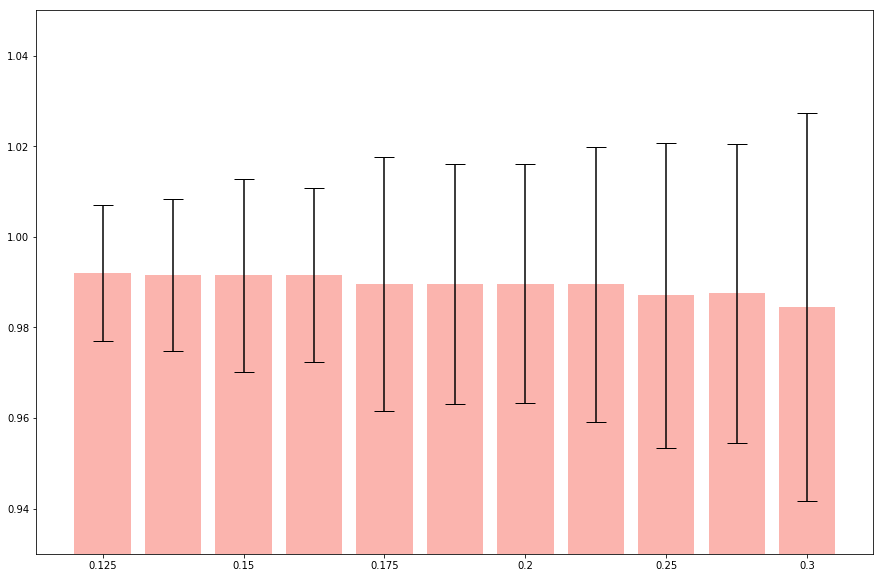

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
cmap = cm.get_cmap('Pastel1')
ax.bar(np.arange(len(prec)), prec["precision"]["mean"], yerr=prec["precision"]["std"], capsize=10, color=cmap(0.1))
ax.set_xticklabels(prec.index)
ax.set_ylim((0.93, 1.05))

In [80]:
prec

recall           precision          
               mean       std      mean       std
Threshold                                        
0.100      0.932799  0.030836  0.991951  0.014990
0.125      0.927050  0.031886  0.991505  0.016804
0.150      0.922592  0.035083  0.991479  0.021287
0.175      0.920686  0.035887  0.991574  0.019167
0.200      0.918783  0.036644  0.989569  0.027997
0.250      0.919938  0.039138  0.989594  0.026521
0.300      0.914730  0.039979  0.989604  0.026401
0.350      0.910453  0.043196  0.989504  0.030357
0.400      0.916513  0.044065  0.987042  0.033584
0.450      0.915538  0.045369  0.987478  0.033045
0.500      0.913293  0.050329  0.984484  0.042719

## Misc

In [38]:
mov_3 = pd.read_csv(f"rPPG/output/mov_3_tweaked_scaling.csv")
mov_3["recall"] = mov_3["TP"]/(mov_3["TP"]+mov_3["FN"])
mov_3["precision"] = mov_3["TP"]/(mov_3["TP"]+mov_3["FP"])

In [39]:
mov_3

,Unnamed: 0,Video,Threshold,Frame number,Time of face tracker,Time of face detector,FN,FP,TN,TP,Time to select points,Time to track points,Point distance mean,Point distance std.,recall,precision
0,0,test-face-detection-videos/mov-3.mp4,0.4,1,0.074372,0.079875,0,0,5364672,856128,0.003070,NaN,NaN,NaN,1.000000,1.000000
1,1,test-face-detection-videos/mov-3.mp4,0.4,2,0.014469,0.063584,29106,10584,5363496,817614,NaN,0.000891,441.449463,213.158936,0.965625,0.987220
2,2,test-face-detection-videos/mov-3.mp4,0.4,3,0.013520,0.054338,9261,26523,5360787,824229,NaN,0.000677,442.368164,213.149170,0.988889,0.968824
3,3,test-face-detection-videos/mov-3.mp4,0.4,4,0.016622,0.056030,21834,31095,5352246,815625,NaN,0.000924,445.580292,216.458817,0.973928,0.963276
4,4,test-face-detection-videos/mov-3.mp4,0.4,5,0.015718,0.054355,39471,20655,5334609,826065,NaN,0.000628,446.913879,218.664017,0.954397,0.975606
5,5,test-face-detection-videos/mov-3.mp4,0.4,6,0.013558,0.053673,24444,20475,5362866,813015,NaN,0.000628,444.223358,216.116074,0.970812,0.975435
6,6,test-face-detection-videos/mov-3.mp4,0.4,7,0.013670,0.054632,9408,9408,5370048,831936,NaN,0.000619,441.814484,213.589447,0.988818,0.988818
7,7,test-face-detection-videos/mov-3.mp4,0.4,8,0.016398,0.053679,5292,22554,5364756,828198,NaN,0.000742,442.671783,213.126312,0.993651,0.973489
8,8,test-face-detection-videos/mov-3.mp4,0.4,9,0.015354,0.053224,0,9408,5364672,846720,NaN,0.000592,445.144867,215.690247,1.000000,0.989011
9,9,test-face-detection-videos/mov-3.mp4,0.4,10,0.015111,0.057133,10584,27993,5350056,832167,NaN,0.000640,447.190857,217.194229,0.987441,0.967456


['ECG', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Marker', 'HRV']


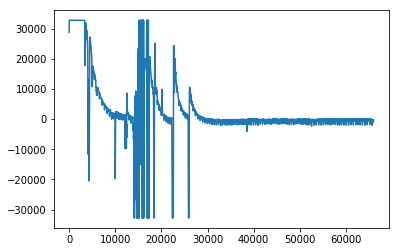

In [47]:

import pyedflib
import numpy as np
import os

f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
print(signal_labels)
ecg = signal_labels.index("ECG")
plt.plot(f.readSignal(ecg))
f._close()
# sigbufs = np.zeros( f.getNSamples()[0]))
# print(f.readSignal(0))

In [31]:
f = pyedflib.EdfReader(f"rPPG/mahnob/Part_1_S_Trial2_emotion.bdf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sampling_freq = f.getSampleFrequency(ecg)
sigbufs = np.zeros((n, f.getNSamples()[0]))
ecg = f.readSignal(ecg)

read -1, less than 35328 requested!!!


In [63]:
from biosppy import storage
from biosppy.signals import ecg as ECG
import pyedflib
import numpy as np
def heart_rates_edf(file_name):
    f = pyedflib.EdfReader(file_name)
    signal_labels = f.getSignalLabels()
    ecg = signal_labels.index("ECG")
    sampling_freq = f.getSampleFrequency(ecg)
    fig, ax = plt.subplots(figsize=(20,10))
    ecg = f.readSignal(ecg)[15000:80000]
#     ecg = ecg[:len(ecg)-10000]
    ecg = (ecg-np.mean(ecg))/np.std(ecg)
    ax.plot(ecg)
    print(f"Sampling freq: {sampling_freq}")
    f._close()
    print(f"Number of ecg points: {len(ecg)} which is {len(ecg)/sampling_freq}s")
    time_axis, filtered, rpeaks, template_time_axis, templates, heart_rate_time_axis, heart_rate = ECG.ecg(signal=ecg, sampling_rate=sampling_freq*1.0, show=False)
    print(f"Number of peaks: {len(rpeaks)}")
    avg_hr = 60*len(rpeaks)*sampling_freq/len(ecg)
    print(f"Heart rate from rpeaks: {avg_hr}")
    return avg_hr

60000


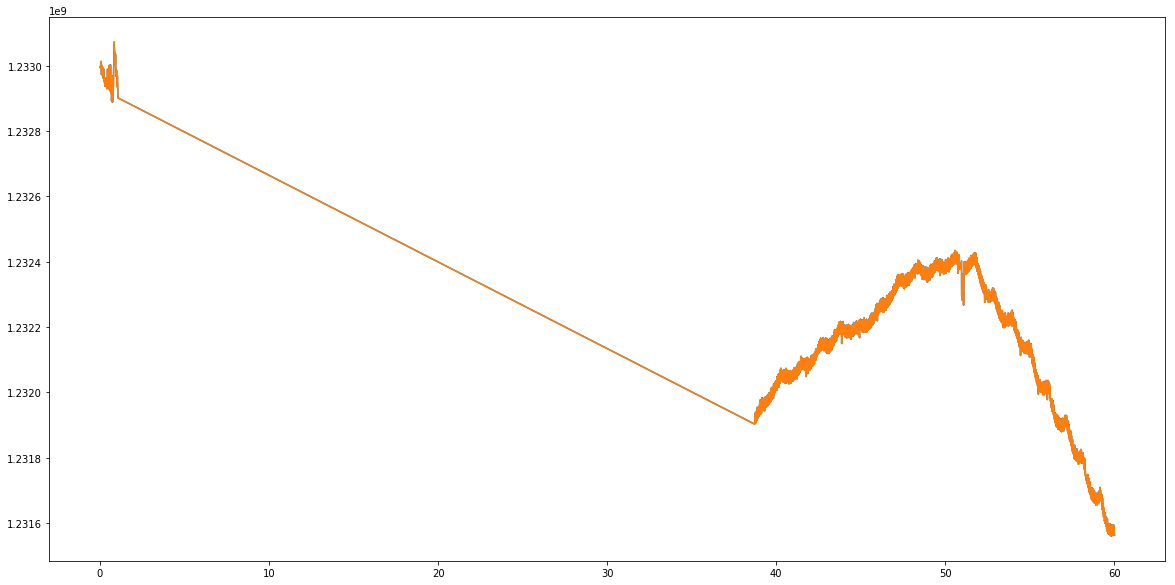

In [163]:
add_time(my_data)
x = np.arange(0, 60, 60/60000)
y = np.interp(x, my_data["Time"], my_data["PPG"])

print(len(y))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(my_data["Time"], my_data["PPG"])
ax.plot(x,y)
# my_data

Sampling freq: 500
Number of ecg points: 19000 which is 38.0s
Number of peaks: 36
Heart rate from rpeaks: 56.8421052631579


56.8421052631579

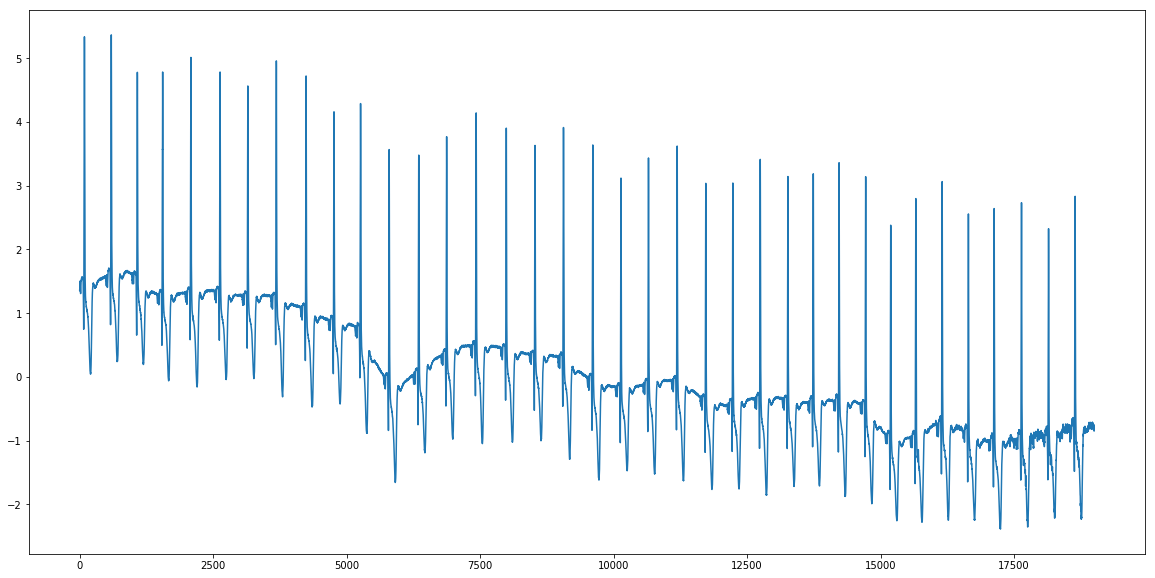

In [132]:
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200104/09-08-06.EDF"
# heart_rates_bdf(file_name)
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200317/16-20-08.EDF"
# heart_rates_bdf(file_name)
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200317/16-22-46.EDF"
# heart_rates_bdf(file_name)
# file_name = "/media/yousuf/Titanic/19-03-2020/dissertation/code/rPPG/experiments/candidate-1/candidate-2-yousuf/16-03-07.EDF"
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200320/11-18-34.EDF"
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200320/14-44-18.EDF"
file_name = "/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/14-19-09.EDF"
# file_name = "/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/18-18-31.EDF"
# file_name = "/home/yousuf/workspace/dissertation/archive/15-18-03.EDF"
heart_rates_edf(file_name)

2174
           Timestamp         PPG
0     37413951935015  1232995568
1     37413961609130  1232996592
2     37413971283193  1232996816
3     37413980957255  1232998608
4     37413990631318  1232995728
5     37414000305380  1233013712
6     37414009979495  1232995856
7     37414019653557  1232997648
8     37414029327620  1232979056
9     37414039001682  1232972976
10    37414048706265  1232977808
11    37414058380328  1232998384
12    37414068054443  1232977584
13    37414077728505  1233001520
14    37414087402568  1232979056
15    37414097107151  1232997200
16    37414106781213  1232980336
17    37414116455276  1232981968
18    37414126129390  1232981360
19    37414135833974  1232967248
20    37414145508036  1232961008
21    37414155182099  1232991024
22    37414164886682  1232986576
23    37414174560745  1232955152
24    37414184234859  1232967792
25    37414193939443  1232951888
26    37414203613505  1232959088
27    37414213287568  1232952336
28    37414222961630  1232940944
29   

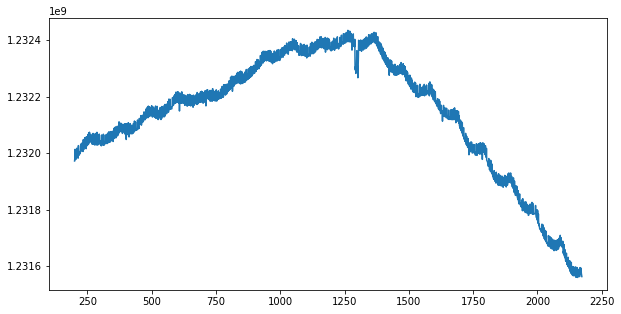

In [161]:
from numpy import genfromtxt
# my_data = genfromtxt('rPPG/test-ppg-watch/2020-03-18 16_18_57.769.csv', delimiter=',')
# my_data = genfromtxt('/media/yousuf/Titanic/19-03-2020/dissertation/code/rPPG/experiments/candidate-1/candidate-2-yousuf/2020-03-19 16_04_09.466-freq-116.csv', delimiter=',')
# my_data = genfromtxt('/media/yousuf/Titanic/19-03-2020/dissertation/code/rPPG/experiments/candidate-1/candidate-2-yousuf/2020-03-19 16_05_33.284-freq-125.csv', delimiter=',')
# my_data = genfromtxt('/home/yousuf/workspace/dissertation/archive/2020-03-19 15:34:47.873-freq-89.csv', delimiter=',')
# my_data = pd.read_csv('/home/yousuf/workspace/dissertation/archive/2020-03-20 12_25_22.109-freq-86.csv')

# my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/2020-03-20 14:20:12.168-freq-35.csv')
# my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/2020-03-20 18:08:37.662-freq-710.csv')
my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/2020-03-20 14:20:12.168-freq-35.csv')
fig,ax=plt.subplots(figsize=(10,5))
print(len(my_data))
print(my_data)
ax.plot(my_data["PPG"][200:])
# my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/2020-03-20 18:08:37.662-freq-710.csv')
# fig,ax=plt.subplots(figsize=(10,5))
# ax.plot(my_data["PPG"])
# my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/2020-03-20 18:15:15.098-freq-771.csv')
# fig,ax=plt.subplots(figsize=(10,5))
# ax.plot(my_data["PPG"])
# my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/2020-03-20 18:19:34.486-freq-951.csv')
# fig,ax=plt.subplots(figsize=(10,5))
# ax.plot(my_data["PPG"])
# my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/2020-03-20 18:18:06.956-freq-927.csv')
# fig,ax=plt.subplots(figsize=(10,5))
# ax.plot(my_data["PPG"])

HR: (168.0, 11794838.43830053)
Sampling freq: 1000
Number of ecg points: 60000 which is 60.0s
Number of peaks: 12
Heart rate from rpeaks: 12.0


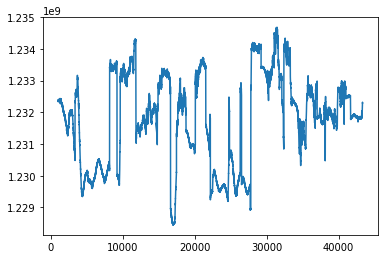

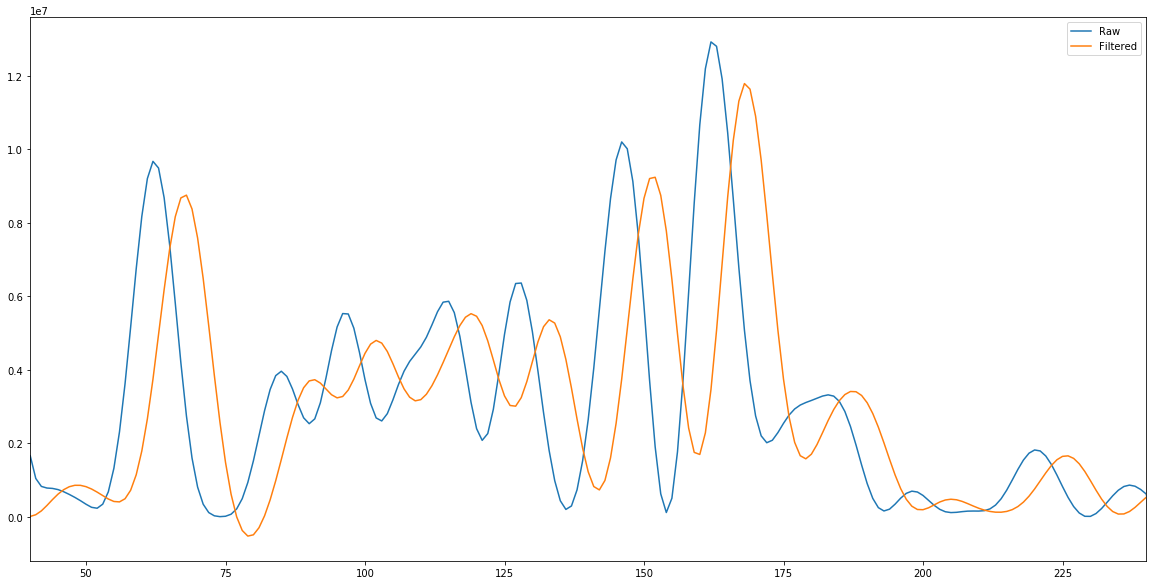

In [160]:
# my_data = my_data[1000:4000]
plt.plot(my_data["PPG"][1000:])
ecg = my_data["PPG"]
ecg = y
# ecg = f.readSignal(ecg)[15000:]
# ecg = ecg[1000:5000]
ecg = (ecg-np.mean(ecg))/np.std(ecg)
# sampling_freq = len(ecg)/50
sampling_freq=1000
print(f"HR: {Processor()._prevalent_freq(ecg, sampling_freq)}")
print(f"Sampling freq: {sampling_freq}")
# f._close()
print(f"Number of ecg points: {len(ecg)} which is {len(ecg)/sampling_freq}s")
time_axis, filtered, rpeaks, template_time_axis, templates, heart_rate_time_axis, heart_rate = ECG.ecg(signal=ecg, sampling_rate=sampling_freq*1.0, show=False)
print(f"Number of peaks: {len(rpeaks)}")
avg_hr = 60*len(rpeaks)*sampling_freq/len(ecg)
print(f"Heart rate from rpeaks: {avg_hr}")

In [125]:
from operator import itemgetter
import sklearn
from sklearn.decomposition import FastICA, PCA
import numpy as np
import scipy.signal

class Processor():
    
    def _prevalent_freq(self, data, framerate):
        """
        Return the most prevalent frequency using power spectrum
        """
        data = (data-np.mean(data))/np.std(data)
        transform = np.fft.rfft(data)
        freqs = np.fft.rfftfreq(len(data), 1.0/framerate)
        freqs = 60*freqs
        band_pass = np.where((freqs < 40) | (freqs > 240) )[0]
        transform[band_pass] = 0
        transform = np.abs(transform)**2
        sos = scipy.signal.butter(3, 0.13, output='sos')
        filtered = scipy.signal.sosfilt(sos, transform)
        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(freqs, transform, label="Raw")
        ax.plot(freqs, filtered, label="Filtered")
        ax.set_xlim(40,240)
        ax.legend()
        id = np.argmax(filtered)
        heart_rate = freqs[id]
        return heart_rate, np.max(filtered)

class ICAProcessor(Processor):

    def get_hr(self, values, framerate):
        ica = FastICA(n_components=1, max_iter=4000)
        signals = ica.fit_transform(values)
        return self._select_maximum_power_frequency([self._prevalent_freq(signals[:,i], framerate) for i in range(3)])

    def _select_maximum_power_frequency(self, rates):
        return max(rates, key=itemgetter(1))[0]
